In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
pwd  //for reading the current directory

'C:\\Users\\Dell\\aditi\\anaconda-jupyter-notebooks'

In [50]:
df1 = pd.read_csv(r"C:\Users\Dell\aditi\anaconda-jupyter-notebooks\House Price Prediction.csv")

In [51]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [52]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [53]:
df2=df1.drop(['availability','society','balcony','area_type'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [54]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [55]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [56]:
df3.describe()
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [57]:
def split(x):
    x=int(x.split(' ')[0])
    return(x)
df3['BHK']=df3['size'].apply(lambda x:split(x))
df3.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [58]:
df3=df3.drop(['size'],axis='columns')
df3.head()


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [59]:
df3['total_sqft'].unique()
def mean(x):
    a=x.split('-')
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(a[0])
    except:
        return None
        
df3['total_sqft']=df3['total_sqft'].apply(mean)
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [60]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [61]:
df3.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [62]:
df4=df3.dropna()

In [63]:
df4.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [64]:
df4['per_sqr_ft']=df4['price']*1000000/df4['total_sqft']
df4.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,price,BHK,per_sqr_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000


In [65]:
lessother=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
llessother=lessother[lessother<=10]
llessother
def other(x):
    
    if x in llessother:
        return 'other'
    else:
        return x
    
df4.location=df4.location.apply(other)
df4.dropna()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,total_sqft,bath,price,BHK,per_sqr_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,66898.349262
13316,other,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4689.0,4.0,488.00,4,104073.363190


In [66]:
len(df4.location.unique())

241

In [67]:
df6=df4.copy()
df6[df6.total_sqft/df6.BHK<300].head()
df6.shape

(13200, 6)

In [68]:
df6.shape
df5=df6[~(df6.total_sqft/df6.BHK<300)]
df5.shape

(12456, 6)

In [69]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.per_sqr_ft)
        st = np.std(subdf.per_sqr_ft)
        reduced_df = subdf[(subdf.per_sqr_ft>(m-st)) & (subdf.per_sqr_ft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        #print(m,' = ',st)
    return df_out
df7 = remove_pps_outliers(df6)
df7

,location,total_sqft,bath,price,BHK,per_sqr_ft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,35200.000000
1,Devarachikkanahalli,1250.0,2.0,40.00,2,32000.000000
2,Devarachikkanahalli,1200.0,2.0,83.00,2,69166.666667
3,Devarachikkanahalli,1170.0,2.0,40.00,2,34188.034188
4,Devarachikkanahalli,1425.0,2.0,65.00,3,45614.035088
...,...,...,...,...,...,...
11435,other,812.0,1.0,26.00,1,32019.704433
11436,other,1440.0,2.0,63.93,3,44395.833333
11437,other,1075.0,2.0,48.00,2,44651.162791
11438,other,1200.0,5.0,325.00,4,270833.333333


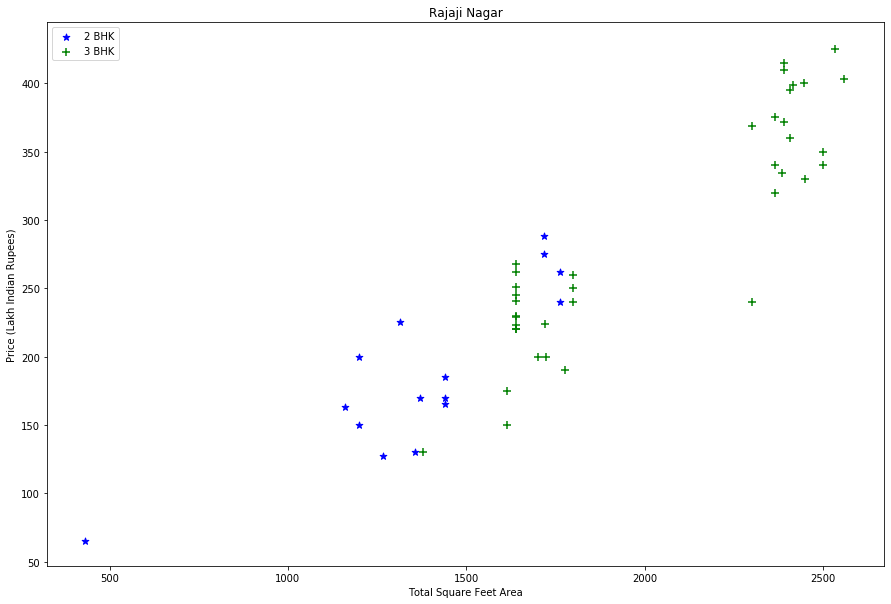

In [70]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='*',color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            #print(bhk_df)
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sqr_ft),
                'std': np.std(bhk_df.per_sqr_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqr_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(8010, 6)

In [72]:
df8[(df8.bath>df8.BHK+2)]
df8.shape

(8010, 6)

In [73]:
df9=df8[~(df8.bath>df8.BHK+2)]
df9.shape

(8001, 6)

In [74]:
df10=df9.drop(['per_sqr_ft'],axis='columns')
df10

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
11431,other,1400.0,7.0,218.0,7
11434,other,1353.0,2.0,110.0,2
11435,other,812.0,1.0,26.0,1
11438,other,1200.0,5.0,325.0,4


In [75]:
df11=pd.get_dummies(df10['location'])
df11

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
df12=pd.concat([df10,df11],axis='columns')
df12.tail()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
11431,other,1400.0,7.0,218.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11434,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11435,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11438,other,1200.0,5.0,325.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11439,other,3600.0,5.0,400.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df12.drop(['location'],axis='columns')
df12.shape

(8001, 246)

In [78]:
y=df12.price
X=df12.drop(['price','location'],axis='columns')
X.head(30)

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1130.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1417.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1705.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1116.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
lr_clf = LinearRegression()
#lr_clf2 = SVC()
#lr_clf3 = RandomForestClassifier(n_estimators=40)
#lr_clf4 = LogisticRegression()

In [87]:
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7301870558222116

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75549268, 0.70568735, 0.75236301, 0.68896017, 0.69317119])

In [89]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.719135,{'normalize': False}
1,lasso,0.680990,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.645758,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [94]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
predict_price('1st Phase JP Nagar',1000, 3, 3)

67.21299675419297

In [111]:
import pickle
f=open('House Price Prediction.pkl','wb')
pickle.dump(lr_clf,f)
#pickle.dump(lr_clf, open('model.pkl','wb'))

In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("House Price Prediction.json","w") as f:
    f.write(json.dumps(columns))